## EDA and Predictive Model for Housing Price
 
[Arun Ramji Shanmugam](https://www.kaggle.com/arunramji) - 15Dec2019

### Problem 

In this kernal we are going to explore the housing price dataset which contains different variables , we will try to analyse it and get some interesting insights out of it , also we will build the model on top of it using linear regression technique for pricing future properties .

Below are the things that we are going to do with this problem.
1. Understanding the data and problem
2. Exploratory Data Analysis
3. Handling Missing Values and Categorical Variables 
4. Model Build for price prediction 

Let's get started !

#### 1. Understanding the data and problem

In [177]:
#Let's import required libraries
import pandas as pd
pd.options.display.max_rows=999
pd.options.display.max_columns =999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [178]:
#Read the dataset
df = pd.read_csv('/Users/arunramji/Downloads/Sourcefiles/Kaggle_Housing_Price/train.csv')

In [179]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
 #Let's see basic stats of entire dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [181]:
#Basic stats for target variable 
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Okay! so based on the above basic stats , we can see that maximum price houses are sold at 755000 and lowest price is 34900 .
Let's plot the target variable and understand its distribution.

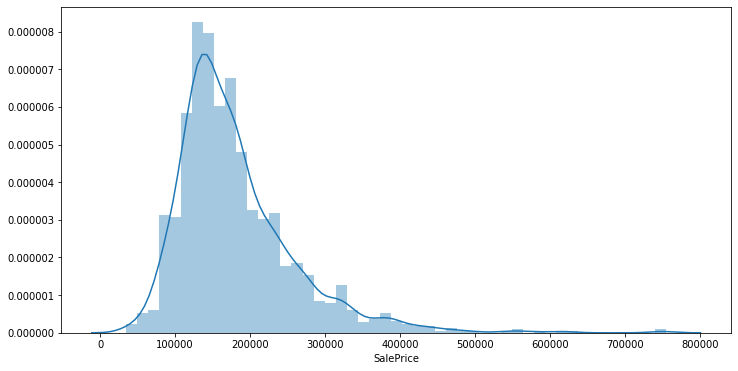

In [182]:
fig , ax = plt.subplots(figsize=(12,6))

sns.distplot(df['SalePrice'])
plt.show()

In [183]:
#df[df['SalePrice']==df['SalePrice'].max()]
df['SalePrice'].nlargest(5)

691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64

In [184]:
df.drop([691,1182,1169,898,803],inplace=True)


It looks like data almost normally distributed , most of the houses falls under the price range of 100000 to 200000.
and also skewed slightly at the right, very few houses are sold at the price of more than 300000!

In [185]:
df_1 = df.drop(['Id'],axis=1)

In [186]:
df_1.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,10

### 2. EDA 

So far we have seen about basic stats and different features from dataset, also undestood somewhat about and 
our target variable .
Now let's try to visualise and get some more insight about relationship about the dataset .

As we are having many features , let's just pick only the features which has pearson correlation with  
target variable more than > 50 %

In [187]:
#correlation Heatmap
corr = df_1.corr()
corr = pd.DataFrame(corr.loc['SalePrice'])
corr = corr[corr['SalePrice']>0.5]
corr


,SalePrice
OverallQual,0.799377
YearBuilt,0.540413
YearRemodAdd,0.527411
TotalBsmtSF,0.606577
1stFlrSF,0.597372
GrLivArea,0.689995
FullBath,0.555265
TotRmsAbvGrd,0.523029
GarageYrBlt,0.503709
GarageCars,0.652636


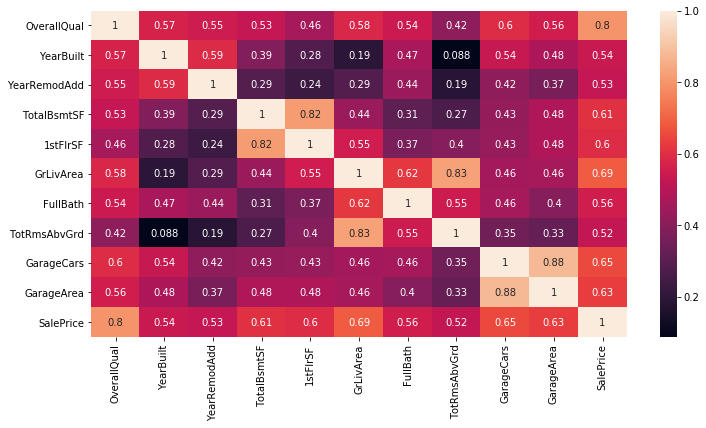

In [188]:
data = df_1[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF'
         ,'GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'
         ,'SalePrice']]

fig , ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)


Based on the correlation map, we now know that variable 'OverallQual' ,'GrLivArea' has top most influence and 
positive correlation for the house pricing .
Higher the price of the house , buyer can expect living area with more square feet and good overall quality .

other than these two variable - Garage cars, Garage area , total square feet of basement and first floor 
square feet also has significant level of linear relationship with price .

Also we can see the multicolinearity among few variables like , first floor square feet vs total basement square feet , living area square feet vs total rooms above grade and garage cars vs garage area .

As our primary goal is to build a model for prediction , we may not need to worry about collinearity .

_"The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.  —Applied Linear Statistical Models, p289, 4th Edition"_

In a same way, let's explore the negative correlation 

In [189]:
corr = df_1.corr()
corr = pd.DataFrame(corr.loc['SalePrice'])
corr = corr[corr['SalePrice']<0]
corr

,SalePrice
MSSubClass,-0.088243
OverallCond,-0.076695
BsmtFinSF2,-0.005731
LowQualFinSF,-0.024758
BsmtHalfBath,-0.035152
KitchenAbvGr,-0.140973
EnclosedPorch,-0.129820
MiscVal,-0.020752
YrSold,-0.028852


Though there are above variables negatively correlated , it is very close to "0"  hence we 
can inference all the above features are doesn't have linear relation ship with our target variable 'price'

To see it visually , let's use the scatter plot for few variables

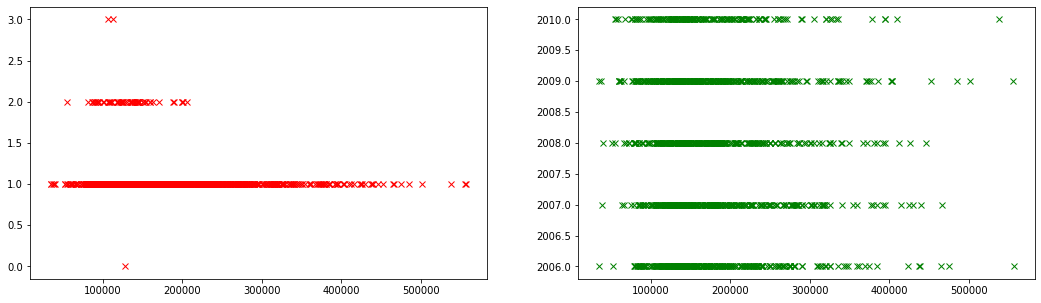

In [190]:
fig , ax = plt.subplots(1,2,figsize=(18,5))

ax[0].plot(df_1['SalePrice'],df_1['KitchenAbvGr'],'rx')
ax[1].plot(df_1['SalePrice'],df_1['YrSold'],'gx')

It is quire obvious that there are no linear relationship at all .

Similarly let's plot few positively correlated variables that we have discussed before .

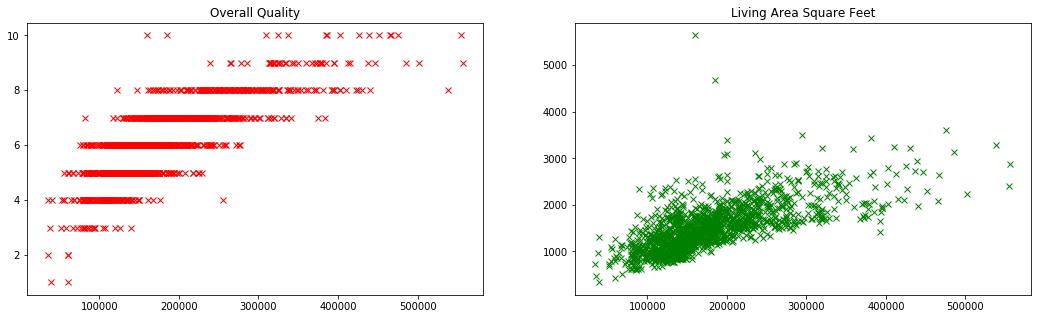

In [191]:
fig , ax = plt.subplots(1,2,figsize=(18,5))

ax[0].plot(df_1['SalePrice'],df_1['OverallQual'],'rx')
ax[0].set_title('Overall Quality')
ax[1].plot(df_1['SalePrice'],df_1['GrLivArea'],'gx')
ax[1].set_title('Living Area Square Feet')
plt.show()

Okay! we were right based on correlation P value , now by visualising this, it is certain that there 
is linear relationship between these independent variable and target variable .

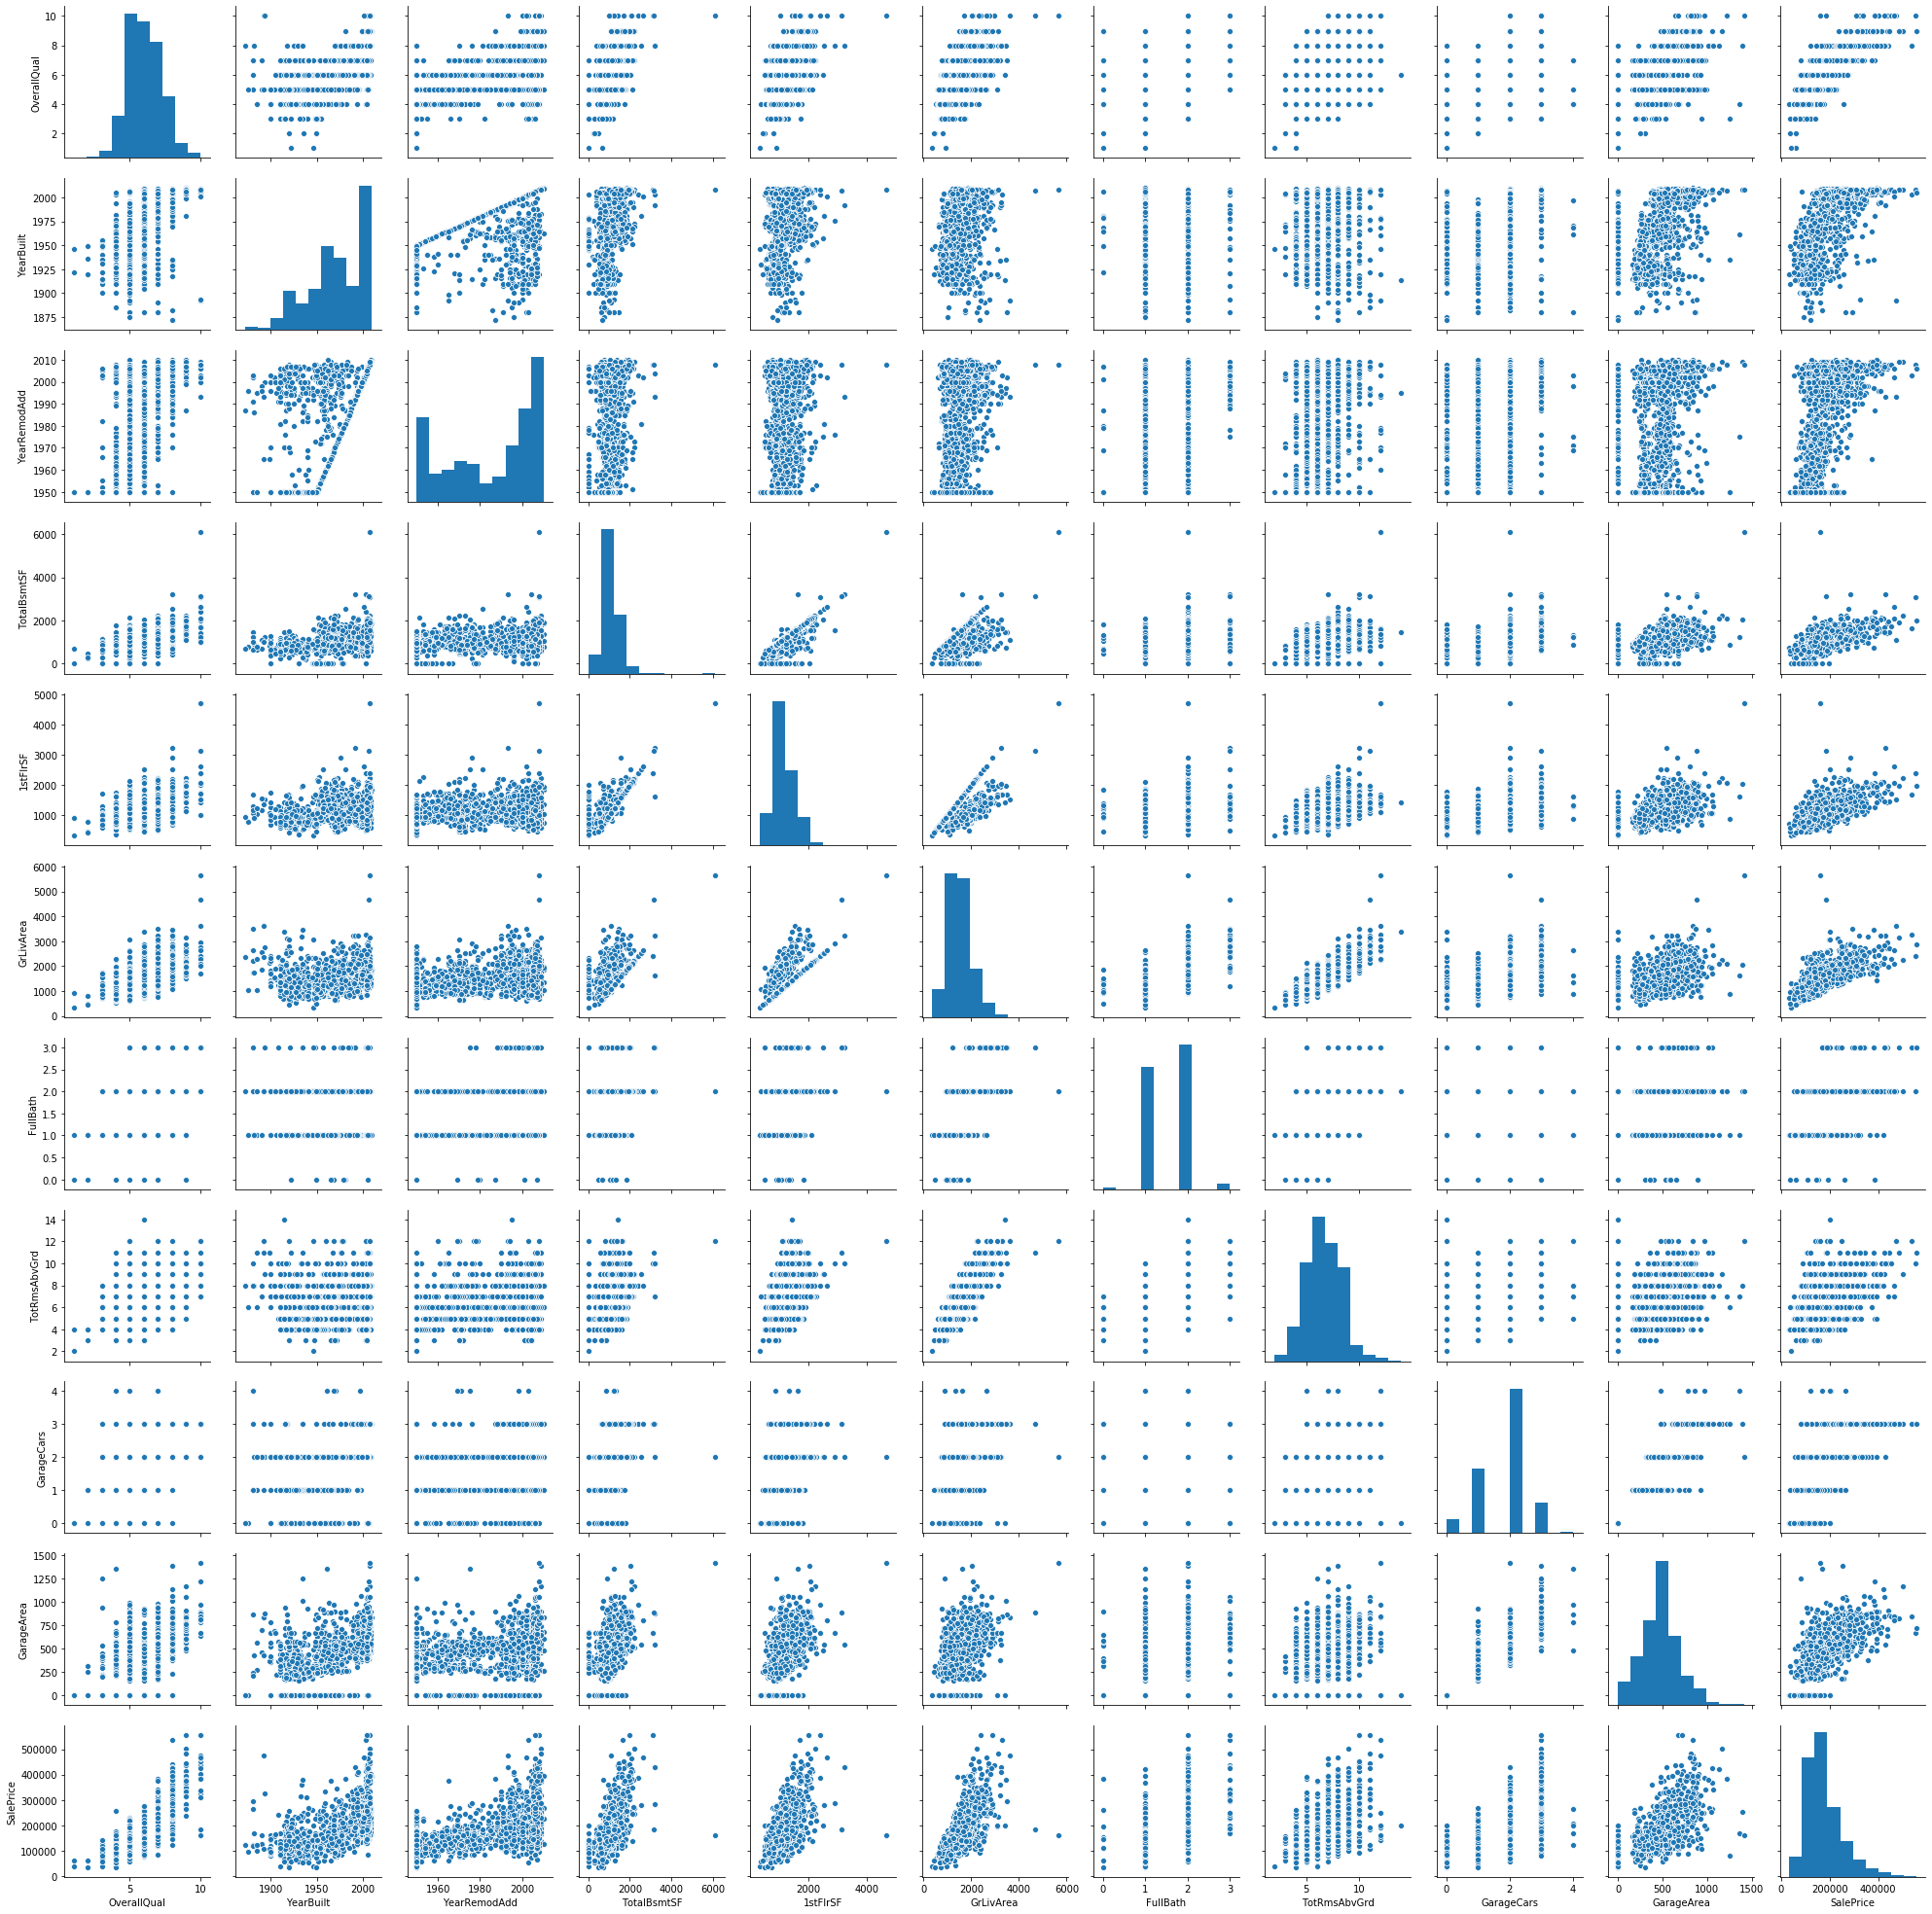

In [192]:
sns.pairplot(df_1[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF'
         ,'GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'
         ,'SalePrice']])

### 3.Handling Missing Values and Cagtegorical variables 

Handling missing values and categorical variable plays a major role in learning model as they may affect 
the performance of our model signinficantly , let's see is there any missing values in our dataset .

Do we have any missing values in our dataset?

In [193]:
Null_Cols = pd.DataFrame(df.select_dtypes(include='object').isnull().sum(),columns=['Null_count'])

In [194]:
Null_Cols[Null_Cols.Null_count>0]

,Null_count
Alley,1364
MasVnrType,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81


In [195]:
Null_Cols[(Null_Cols.Null_count/len(df_1))>0.8]

,Null_count
Alley,1364
PoolQC,1449
Fence,1175
MiscFeature,1401


It seems categorical variables are having many missing values , among them Alley,PoolQC,Fence and MiscFeature
has more than 80% of the observation as Null values , hence we can drop those variable as they are not going to contribute much for our model.

As we all as we can drop the features which has very low (close to 0 P value) correlation


In [196]:
df_1 = df_1.drop(['Alley','PoolQC','Fence','MiscFeature','MSSubClass','OverallCond',
                 'BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch'
                 ,'MiscVal','YrSold'],axis=1)
df_1.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,2,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,5,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,9,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,0,0,0,2,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,12,WD,Normal,250000


let's see is there any numeric variable has missing values.

In [197]:
dataset = df_1.select_dtypes(include='int64')
pd.DataFrame(dataset.isnull().sum(),columns=['Null_count'])

,Null_count
LotArea,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
BsmtFinSF1,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0
GrLivArea,0


As there are no missing values in numeric variable , we don't have to do anything on that .

Let's see is there any float variable type with missing values.

In [198]:
dataset = df_1.select_dtypes(include='float')
pd.DataFrame(dataset.isnull().sum(),columns=['Null_count'])

,Null_count
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


There are few ways we can handle the missing values in numeric variable , 

    1. Imputing with mean, median or mode of that particluar variable 
    2. Drop the missing values from dataset
    3. Predict the missing values with algorithms
 
 Let's go with the first approach and impute the missing values with an avaerage of its own.

In [199]:
df_1['LotFrontage'].fillna(np.mean(df_1['LotFrontage']),inplace=True)
df_1['MasVnrArea'].fillna(np.mean(df_1['MasVnrArea']),inplace=True)
df_1['GarageYrBlt'].fillna(np.round(np.mean(df_1['GarageYrBlt'])),inplace=True)  #rounding of the value as it is year value
#np.round(np.mean(df_1['GarageYrBlt']))

df_1.sample(10)



,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
482,RM,50.000000,2500,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,1915,2005,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,TA,PConc,TA,TA,No,ALQ,299,Unf,611,910,GasA,Ex,Y,SBrkr,916,910,1826,1,1,1,4,Ex,7,Min2,1,Gd,Attchd,1915.0,Unf,1,164,Fa,Fa,Y,0,0,0,0,0,6,WD,Normal,155000
851,RL,69.850334,3196,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,1273,1273,GasA,Ex,Y,SBrkr,1456,0,1456,0,2,0,2,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,400,TA,TA,Y,143,20,0,0,0,5,WD,Normal,215000
1246,FV,65.000000,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,756,756,GasA,Ex,Y,SBrkr,756,797,1553,0,2,1,3,Gd,6,Typ,0,NaN,Attchd,2005.0,RFn,2,615,TA,TA,Y,0,45,0,0,0,3,New,Partial,186500
1054,RL,90.000000,11367,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,210.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,932,Unf,133,1065,GasA,Ex,Y,SBrkr,1091,898,1989,1,2,1,3,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,586,TA,TA,Y,199,60,0,0,0,11,WD,Normal,255000
1085,RL,73.000000,9069,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,6,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,747,Unf,189,936,GasA,Ex,Y,SBrkr,996,0,996,1,1,0,2,Gd,5,Typ,0,NaN,Attchd,1992.0,Unf,2,564,TA,TA,Y,120,0,0,0,0,4,WD,Normal,147000
448,RM,50.000000,8600,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,1937,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,780,780,GasA,TA,Y,SBrkr,780,596,1376,0,2,0,3,TA,7,Typ,1,Gd,Detchd,1937.0,Unf,1,198,TA,TA,N,0,0,0,0,0,6,WD,Normal,119500
392,RL,69.850334,8339,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1959,1959,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,SBrkr,882,0,882,0,1,0,3,TA,5,Typ,0,NaN,Attchd,1959.0,RFn,1,294,TA,TA,Y,0,0,0,0,0,7,WD,Normal,106500
1445,RL,70.000000,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,0,814,GasA,Gd,Y,SBrkr,913,0,913,1,1,0,3,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,5,WD,Normal,129000
185,RM,90.000000,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,3608,0,2,1,4,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,410,0,6,WD,Normal,475000
318,RL,90.000000,9900,Pave,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,7,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,360,1347,GasA,Ex,Y,SBrkr,1372,1274,2646,1,2,1,4,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,0,0,0,4,WD,Normal,260000


#### Handling Categorical Variables

For linear regression , input variable should always be in numerical , even though if there any categorical 
variable , we will have to covert it in to numeric one.

Let's see all the categorical variable from dataset.

In [200]:
#Categorical Variable
df_1.select_dtypes(include='object').count()

MSZoning         1455
Street           1455
LotShape         1455
LandContour      1455
Utilities        1455
LotConfig        1455
LandSlope        1455
Neighborhood     1455
Condition1       1455
Condition2       1455
BldgType         1455
HouseStyle       1455
RoofStyle        1455
RoofMatl         1455
Exterior1st      1455
Exterior2nd      1455
MasVnrType       1447
ExterQual        1455
ExterCond        1455
Foundation       1455
BsmtQual         1418
BsmtCond         1418
BsmtExposure     1417
BsmtFinType1     1418
BsmtFinType2     1417
Heating          1455
HeatingQC        1455
CentralAir       1455
Electrical       1454
KitchenQual      1455
Functional       1455
FireplaceQu       765
GarageType       1374
GarageFinish     1374
GarageQual       1374
GarageCond       1374
PavedDrive       1455
SaleType         1455
SaleCondition    1455
dtype: int64

for converting categorical variable in to nuermic one , we need to use a method called "dummy coding" to 
convert single cateogrical variable into multiple numerical variable .

For example, when we do dummy encoding for categorical nominal variable 'MSZoning' which contains 5 values, will be encoded into 5 new colums for each values .


In [201]:
df_1['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [202]:
data= pd.get_dummies(df_1['MSZoning']).head(100)
data
#data.sort_values(by=['Pave'],ascending=False).head()

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,1,0


Let's apply this technique for all the nominal variables in our dataset .

In [203]:
df_1 = pd.get_dummies(df_1,columns=['MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1'
                                    ,'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
                                   ,'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir'
                                   ,'GarageType','SaleType','SaleCondition','MasVnrType','LandContour'],drop_first=True)

#drop_first tells to drop one of the encoded variable as it may cause "dummy variabel trap" .

In [204]:
'''col =['MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1'
                                    ,'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
                                   ,'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir'
                                   ,'GarageType','SaleType','SaleCondition','MasVnrType','LandContour']
for i in col:
    df[i] = pd.factorize(df[i])[0]'''

"col =['MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1'\n                                    ,'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'\n                                   ,'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir'\n                                   ,'GarageType','SaleType','SaleCondition','MasVnrType','LandContour']\nfor i in col:\n    df[i] = pd.factorize(df[i])[0]"

In [205]:
#Let's visualise some radom sample from data after encding
df_1.head(10)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.000000,8450,Reg,Gtl,7,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,150,856,Ex,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,NaN,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,2,208500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,80.000000,9600,Reg,Gtl,6,1976,1976,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,TA,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,5,181500,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,68.000000,11250,IR1,Gtl,7,2001,2002,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,TA,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,

We can apply the above technique for nominal variables like 'MSZoning  .
But , for ordinal variable(categorical variables with some order in it ) has to be treated differently .

For eg- 'LandSlope' variable with 3 values Gtl(gentle) , Mod(moderate) and Sev(severe) , as it has some order in it , like severe>moderate>gentle , we should encode it in some sort of ranking 0>1>2.

Let's do that 

In [206]:
df_1['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

Before applying encoding for ordinal variables, let's fill the missing values of remaining categorical variable with some valid value, which means even missing values will be coverted as one of the valid categorical value for our model.

In [207]:
data = df_1.select_dtypes(include=object).isna().sum()
data = pd.DataFrame(data,columns=['Count'])
data[data['Count']>0]


,Count
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageFinish,81
GarageQual,81
GarageCond,81


In [208]:
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2','Electrical','FireplaceQu','FireplaceQu'
    ,'GarageFinish','GarageQual','GarageCond']

In [209]:
df_1[cols] = df_1[cols].replace({np.nan:'Unknown'}) #Replacing missing values with 'Unknown'

Fine ! , we have replaced all the missing values as 'Unknown' category for our ordinal variables .

Now let's see how we can do encoding for these categrical variables 

In [210]:
#Ordinal categorical variable from dataset
data

,Count
LotShape,0
LandSlope,0
ExterQual,0
ExterCond,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
HeatingQC,0


#### Encoding ordinal variable by using Find/Replace
There are lot of ways we can encode the ordinal variable , by using find and replace we can understand the feature
specifically and assign the value based on our understanding .

In [211]:
dict_BsmtQual = {"BsmtQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_BsmtCond = {"BsmtCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_BsmtExposure = {"BsmtExposure":{"Gd":5,"Av":4,"Mn":3,"No":2,"Unknown":0}}
dict_BsmtFinType1 = {"BsmtFinType1":{"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"Unknown":0}}
dict_BsmtFinType2 = {"BsmtFinType2":{"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"Unknown":0}}
dict_Electrical = {"Electrical":{"SBrkr":6,"FuseA":5,"FuseF":4,"FuseP":3,"Mix":0,"Unknown":0}}
dict_FireplaceQu = {"FireplaceQu":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_GarageFinish = {"GarageFinish":{"Fin":6,"RFn":5,"Unf":4,"Unknown":0}}
dict_GarageQual = {"GarageQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_GarageCond = {"GarageCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_LotShape = {"LotShape":{"Reg":5,"IR1":4,"IR2":3,"IR3":2}}
dict_LandSlope = {"LandSlope":{"Gtl":5,"Mod":4,"Sev":3}}
dict_ExterQual = {"ExterQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_ExterCond = {"ExterCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_HeatingQC = {"HeatingQC":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_KitchenQual = {"KitchenQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Unknown":0}}
dict_Functional = {"Functional":{"Typ":5,"Min1":4,"Min2":3,"Mod":2,"Maj1":1,"Maj2":0,
                                "Sev":0}}
dict_PavedDrive = {"PavedDrive":{"Y":3,"P":2,"N":1}}

In [212]:
for i in [dict_BsmtQual,dict_BsmtCond,dict_BsmtExposure,dict_BsmtFinType1,dict_BsmtFinType2,dict_Electrical
         ,dict_FireplaceQu,dict_GarageFinish,dict_GarageQual,dict_GarageCond,dict_LotShape,dict_LandSlope
         ,dict_ExterQual,dict_ExterCond,dict_HeatingQC,dict_KitchenQual,dict_Functional,dict_PavedDrive] :
    #print(i)
    df_1.replace(i,inplace=True)

In [213]:
df_1.head(10)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.000000,8450,5,5,7,2003,2003,196.0,4,3,4,3,2,6,706,1,150,856,5,6,856,854,1710,1,2,1,3,4,8,5,0,0,2003.0,5,2,548,3,3,3,0,61,0,0,0,2,208500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,80.000000,9600,5,5,6,1976,1976,0.0,3,3,4,3,5,5,978,1,284,1262,5,6,1262,0,1262,0,2,0,3,3,6,5,1,3,1976.0,5,2,460,3,3,3,298,0,0,0,0,5,181500,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,68.000000,11250,4,5,7,2001,2002,162.0,4,3,4,3,3,6,486,1,434,920,5,6,920,866,1786,1,2,1,3,4,6,5,1,3,2001.0,5,2,608,3,3,3,0,42,0,0,0,9,223500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

We have encoded all the categorical variable from our dataset and also replaced Missing values,
almost we have done with all the data preprocessing steps for building the model.

Now an interesting part , Model buiding, Let's start


As a first step  , let's assign the the independent and dependent variable from our dataset .


In [214]:
cols = pd.DataFrame(df_1.columns)
cols

,0
0,LotFrontage
1,LotArea
2,LotShape
3,LandSlope
4,OverallQual
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,ExterQual
9,ExterCond


In [215]:
data = df_1.drop(columns='SalePrice')

In [216]:
#Variable Assignment
X = data.values
y = df_1['SalePrice']

In [217]:
y[0:10]

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

Let's split data set in to training and test set using SciKit Learn libaray

In [218]:
#split train and test set
from sklearn.model_selection import train_test_split
#tuple unpacking of train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #20% data splitted as test set 

We have succesfully splitted the data set in to train and test with the ratio of 80:20 .

Now as a next step let's fit our training set for linear regression

In [219]:
#train the model for training set
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#poly = PolynomialFeatures(degree=2)
#X_poly = poly.fit_transform(X_train)
lm = LinearRegression()  #instantiating linear regression object
model=lm.fit(X_train,y_train)

We build Linear regression model for training set . 
Let's what is intercept term calcualted 

In [220]:
#Intercept calculated by model
print('Intercept found by Linear regression Model :\n',lm.intercept_)

Intercept found by Linear regression Model :
 -1412314.227119746


Let's see all the coefficient(parameter) computed for each feature in training set  

In [221]:
#Coefficient for each features
cdf = pd.DataFrame(lm.coef_,df_1.columns[df_1.columns!='SalePrice'],
                   columns=['Parameter'])


In [222]:
cdf

,Parameter
LotFrontage,1.461837e+01
LotArea,5.280990e-01
LotShape,-3.730799e+02
LandSlope,-1.058272e+03
OverallQual,9.697950e+03
YearBuilt,1.899137e+02
YearRemodAdd,1.379122e+02
MasVnrArea,2.406955e+01
ExterQual,6.059215e+03
ExterCond,-1.911813e+03


Cool! , we have computed two important parameter to build linear regression model , let's use those values to 
predict the values in our unknown data(test set)

In [223]:
#prediction
prediction = lm.predict(X_test)
prediction

array([ 174295.61605677,  130855.93761638,  146953.21441501,
         74835.4272377 ,  297735.77862786,  135520.8260853 ,
        238092.28355687,  291225.21635083,  237568.4179998 ,
        136376.0689722 ,  117699.54365063,  167400.9094928 ,
         39108.49840434,  326982.6634336 ,   43177.59905824,
         99649.92092477,  195231.02070936,  400714.86462531,
        208884.17479372,  227566.75014801,  140259.1397363 ,
        269252.8196693 ,  191950.2425779 ,  151317.58174307,
        206723.62159679,  134335.98738387,   95699.96450343,
        105880.2443854 ,  244969.06989067,  352054.66693921,
        114870.65758757,  104416.37703425,  191479.08051832,
        100040.56965275,  151647.22253173,  192167.15569039,
        217373.52648591,  160770.23025291,  348229.58219992,
        103520.88292038,  128341.67187413,  241388.77560867,
        132797.69759728,   68319.66127996,  115428.98952124,
        214433.82666069,  133587.57215429,  130658.63339665,
        150348.0731183 ,

In [224]:
pred = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
pred

,Actual,Predicted
497,184000,174295.616057
1266,122000,130855.937616
411,145000,146953.214415
1049,84900,74835.427238
1036,315500,297735.778628
613,147000,135520.826085
218,311500,238092.283557
1187,262000,291225.216351
1196,219210,237568.418000
887,135500,136376.068972


#### Model Evaluation

One of the critical step in ML model building is to evaluate how it works for test set and unknown values,
and determine accuracy of it.

If our model working fine , above predicted value for test set (X_test) should be closer to the acutal values in test set (y_test), one of the efficient way to visualise this is using scatter plot of prediction and y_test value.

if we get a linear data , which means model has predicted values closer to the actual values . 

Let's see how our model performed!

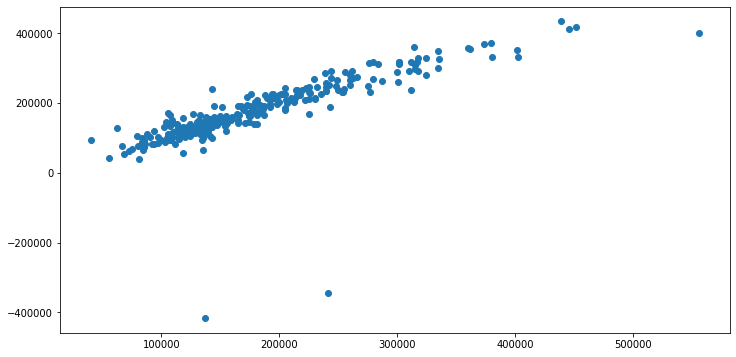

In [225]:
fig , ax = plt.subplots(figsize=(12,6))
plt.scatter(y_test,prediction)

We can visualise the prediction and test set in bar plot too to see the variance between actual and predicted value .

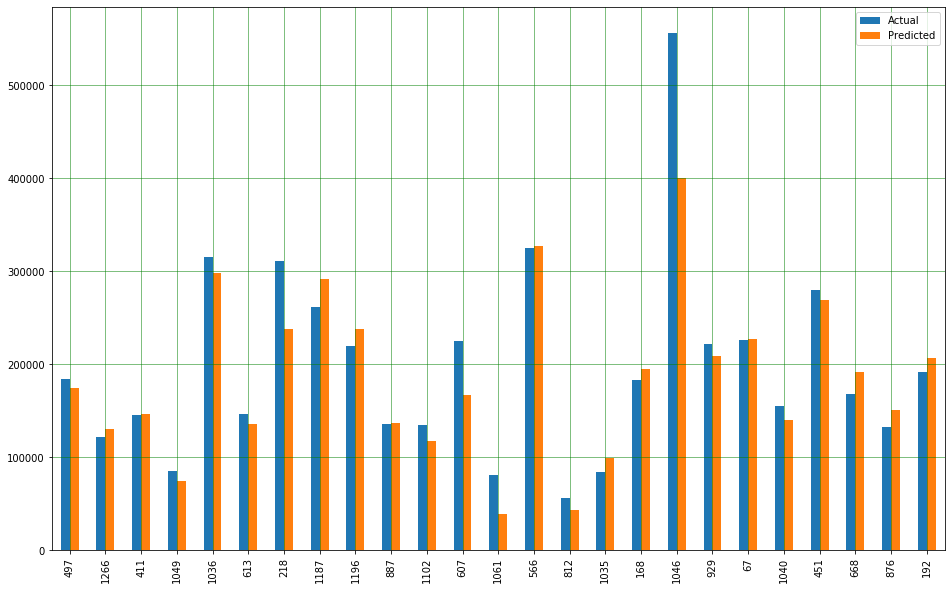

In [226]:
data = pred.head(25)
data.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

It seems our model has done good job as most of the data points are very close to that actual values. 

Another attribute of good linear regression model is, residual should be normally distributed , if not there is a possibility that we have built a biased model or regression is not a right choice .

let's see the residual distribution for our model .

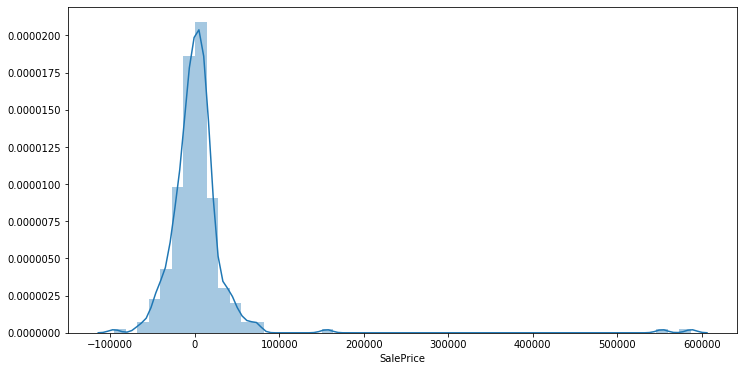

In [227]:
#distribution of residuals 
fig , ax = plt.subplots(figsize=(12,6))

sns.distplot(y_test-prediction)

It looks to be residual of our model normally distributed , hence the choice of linear regression model
is good for our data. 

The primary goal of any ML model is to attain the optimal parameter or coefficient which gives the least loss function . Root mean square is one of the commonly used loss function for linear regression, let's see what is loss function of our model

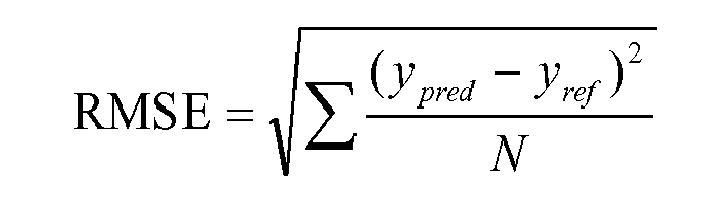

In [228]:
#Model Evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
#print('MSLE:',metrics.mean_squared_log_error(y_test,prediction))

MAE: 21400.59096494595
MSE: 2850867443.624401
RMSE: 53393.514995965576


In [231]:
metrics.r2_score(y_test,prediction)

0.5425623465387968

In [72]:
(prediction<0).any()

True

### Model Prediction for Competition

In [365]:
dataset = pd.read_csv('/Users/arunramji/Downloads/Sourcefiles/Kaggle_Housing_Price/test.csv')

In [366]:
dataset.drop('Id',axis=1,inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [367]:
dataset = dataset.drop(['Alley','PoolQC','Fence','MiscFeature','MSSubClass','OverallCond',
                 'BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch'
                 ,'MiscVal','YrSold'],axis=1)
dataset.head()
dataset.shape

(1459, 66)

In [368]:
dataset = pd.get_dummies(dataset,columns=['MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1'
                                    ,'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
                                   ,'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir'
                                   ,'GarageType','SaleType','SaleCondition','MasVnrType','LandContour'],drop_first=True)

#drop_first tells to drop one of the encoded variable as it may cause "dummy variabel trap" .
dataset.shape

(1459, 170)

In [369]:
cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2','Electrical','FireplaceQu','FireplaceQu'
    ,'GarageFinish','GarageQual','GarageCond']
dataset[cols] = dataset[cols].replace({np.nan:'Unknown'}) #Replacing missing values with 'Unknown'

In [370]:
for i in [dict_BsmtQual,dict_BsmtCond,dict_BsmtExposure,dict_BsmtFinType1,dict_BsmtFinType2,dict_Electrical
         ,dict_FireplaceQu,dict_GarageFinish,dict_GarageQual,dict_GarageCond,dict_LotShape,dict_LandSlope
         ,dict_ExterQual,dict_ExterCond,dict_HeatingQC,dict_KitchenQual,dict_Functional,dict_PavedDrive] :
    #print(type(i))
    dataset.replace(i,inplace=True)

In [371]:
dataset.fillna(value=0,inplace=True)

In [372]:
final_train, final_test = df_1.align(dataset,join='inner', axis=1)

In [373]:
final_train.shape

(1455, 176)

In [374]:
final_test.shape

(1459, 176)

In [377]:
data = final_train
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Electrical,ExterCond,ExterQual,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Heating_GasW,Heating_Grav,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope,LotArea,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_None,MasVnrType_None,MasVnrType_None,MasVnrType_Stone,MasVnrType_Stone,MasVnrType_Stone,MasVnrType_Stone,MoSold,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallQual,PavedDrive,PoolArea,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,0,3,0,0,0,0,3,2,706,6,1,1,4,150,1,0,1,0,0,0,0,0,0,0,1,0,0,6,3,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,5,548,2,3,5,3,1,0,0,0,0,2003.0,1710,1,5,0,0,0,0,0,0,1,0,0,4,0,0,1,5,8450,0,0,0,1,65.0,5,0,0,1,0,196.0,1,1,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,7,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,856,0,2003,2003
1,1262,0,0,3,0,0,0,0,3,5,978,5,1,0,4,284,1,1,0,0,0,0,0,0,0,0,1,0,0,6,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1,1,0,0,0,0,2,5,460,2,3,5,3,1,0,0,0,0,1976.0,1262,0,5,0,0,0,0,1,0,0,0,0,3,0,0,1,5,9600,0,1,0,0,80.0,5,0,0,1,0,0.0,0,0,0,0,1,1,1,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,6,1262,298,1976,1976
2,920,866,0,3,0,0,0,0,3,3,486,6,1,1,4,434,1,0,1,0,0,0,0,0,0,0,1,0,0,6,3,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0,1,0,0,0,2,5,608,2,3,5,3,1,0,0,0,0,2001.0,1786,1,5,0,0,0,0,0,0,1,0,0,4,0,0,1,5,11250,0,0,0,1,68.0,4,0,0,1,0,162.0,1,1,1,1,0,0,0,0,0,0,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,7,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,6,920,0,2001,2002
3,961,756,

In [378]:
X_train = data.values
#X_train = data.head(110).values

In [380]:
#y_train = final_train.head(110)['SalePrice']
y_train = df_1['SalePrice']

In [381]:
data_1 = final_test
data_1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Electrical,ExterCond,ExterQual,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Heating_GasW,Heating_Grav,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope,LotArea,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_None,MasVnrType_None,MasVnrType_None,MasVnrType_Stone,MasVnrType_Stone,MasVnrType_Stone,MasVnrType_Stone,MoSold,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallQual,PavedDrive,PoolArea,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,0,2,0,0,0,0,3,2,468.0,3,2,0.0,3,270.0,1,1,0,0,0,0,0,0,0,0,1,0,0,6,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,5.0,730.0,1.0,3,4,3,1,0,0,0,0,1961.0,896,0,3,0,0,0,0,1,0,0,0,0,3,0,0,1,5,11622,0,0,0,1,80.0,5,0,1,0,0,0.0,0,0,0,0,1,1,1,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,120,1,5,882.0,140,1961,1961
1,1329,0,0,3,0,0,0,0,3,2,923.0,5,1,0.0,3,406.0,1,0,1,0,0,0,0,0,0,0,1,0,0,6,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,5.0,312.0,1.0,3,4,3,1,0,0,0,0,1958.0,1329,1,3,0,0,0,0,1,0,0,0,0,4,0,0,1,5,14267,0,0,0,0,81.0,4,0,0,1,0,108.0,1,1,1,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,6,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,6,1329.0,393,1958,1958
2,928,701,0,3,0,0,0,0,3,2,791.0,6,1,0.0,4,137.0,1,0,1,0,0,0,0,0,0,0,1,0,0,6,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0,1,0,0,0,2,5.0,482.0,2.0,3,6,3,1,0,0,0,0,1997.0,1629,1,4,0,0,0,0,0,0,1,0,0,3,0,0,1,5,13830,0,0,0,1,74.0,4,0,0,1,0,0.0,0,0,0,0,1,1,1,1,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,5,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0

In [344]:
data_1.fillna(value=0,inplace=True)

/Users/arunramji/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [383]:
X_test = data_1.values
#X_test = data_1.head(100).values

In [384]:
#y_test = final_test['SalePrice']

In [413]:
#train the model for training set
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)  #instantiating linear regression object
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [414]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [416]:
print('Intercept found by Linear regression Model :\n',lm.intercept_)
print('Intercept found by ridge regression Mode:\n',rr.intercept_)

Intercept found by Linear regression Model :
 -341632.58694158075
Intercept found by ridge regression Mode:
 -341985.11458887416


In [387]:
#Coefficient for each features
cdf = pd.DataFrame(lm.coef_,final_train.columns[final_train.columns!='SalePrice'],
                   columns=['Parameter'])

In [388]:
cdf

,Parameter
1stFlrSF,4.268602e+00
2ndFlrSF,6.164998e+00
3SsnPorch,4.327202e+01
BedroomAbvGr,-3.006029e+03
BldgType_2fmCon,-1.337894e+04
BldgType_Duplex,-1.565397e+04
BldgType_Twnhs,-4.162778e+04
BldgType_TwnhsE,-3.644429e+04
BsmtCond,-1.976657e+03
BsmtExposure,4.873622e+03


In [417]:
#prediction
prediction = lm.predict(X_train)
predict  = pd.DataFrame(prediction,columns=['prediction'])
predict
prediction_rr = rr.predict(X_train)

In [389]:
prediction_test = lm.predict(X_test)

In [390]:
prediction_test

array([112083.85403452, 164284.00753242, 169219.98884825, ...,
       148381.36652284, 243170.16234864, 218722.942358  ])

In [391]:
#data_1.isnull().sum()

In [352]:
#data_1.columns[(data_1 == 0).all()]

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'Heating_GasA', 'Heating_OthW', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'Utilities_NoSeWa'],
      dtype='object')

In [400]:
final = pd.DataFrame(prediction_test,columns=['Predicted_Price'],dtype='str')

In [364]:
#(data_1 == 0).sum()

In [363]:
#(data == 0).sum()

In [401]:
#final.to_clipboard(excel=True , sep = ',')

In [405]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_train,prediction))
print('MSE:',metrics.mean_squared_error(y_train,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,prediction)))
print('MSLE:',np.sqrt(metrics.mean_squared_log_error(y_train,prediction)))

MAE: 14652.808435215204
MSE: 445404054.1806377
RMSE: 21104.597939326817
MSLE: 0.12410700322728331


In [418]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_train,prediction_rr))
print('MSE:',metrics.mean_squared_error(y_train,prediction_rr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,prediction_rr)))
print('MSLE:',np.sqrt(metrics.mean_squared_log_error(y_train,prediction_rr)))

MAE: 16022.436337603285
MSE: 552072524.7094753
RMSE: 23496.22362656338
MSLE: 0.13313991692415153
